<a href="https://colab.research.google.com/github/henriquesluizfernando/datascience/blob/main/Covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID-19

Em dezembro de 2019, na cidade de Wuhan, China, ocorreu a transmissão de um vírus chamado SARS-CoV-2, o coronavírus. A doença causada por esse vírus se chama COVID-19. O vírus se espalhou de forma tão intensa que foi decretado estado de pandemia.

A transmissão ocorre por meio gotículas de saliva, espirro, tosse, catarro, e passar a mão em superfícies contaminadas e depois nos olhos, nariz ou boca.

<center><img alt="Colaboratory logo" width="50%" src="https://ufla.br/images/noticias/2020/03_mar/coronavirus-ufla.jpg"></center>

[Segundo a OMS](https://coronavirus.saude.gov.br/sobre-a-doenca), cerca de 80% dos infectados são assintomáticos ou possuem poucos sintomas e por volta de 20% dos casos necessita de atendimento hospitalar por dificuldade de respirar.

Alguns dos sintomas são:

* tosse
* febre
* perda de olfato
* alteração no paladar
* dificuldade de respirar

Alguns estudos foram feitos sobre como tratar a doença, quais medicamentos são mais eficazes mas ainda não há um consenso. Vacinas vem sendo testadas e fabricadas para imunizar a população.

Esse projeto tem como objetivo olhar os dados sobre coronavírus no mundo e fazer uma análise.

# Obtenção de Dados

A base de dados utilizada para esse estudo foi do site "ourworldindata", mais precisamente nesse [link](https://github.com/owid/covid-19-data/tree/master/public/data).O arquivo analisado é o ```csv```. Desde o início houve divergências sobre base de dados de países, estados e municipios, e o presente estudo será feito em cima da base mencionada, o que não significa que seja a unica ou a mais correta.

# Análise Exploratória dos Dados
 
 Nessa seção os dados serão analisados. Se observará a dimensão do dataset, os tipos das variáveis presentes, se existem dados faltando e possíveis correções

 

In [1]:
# bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style()
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# dataset COVID-19
df = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')

In [2]:
# primeiras entradas

df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2019-12-31,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-01-01,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-01-02,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


In [5]:
# tamanho do dataset

print(f'{df.shape[0]} entradas')
print(f'{df.shape[1]} colunas')

52441 entradas
41 colunas


In [8]:
# tipo das variáveis

df.dtypes

iso_code                            object
continent                           object
location                            object
date                                object
total_cases                        float64
new_cases                          float64
new_cases_smoothed                 float64
total_deaths                       float64
new_deaths                         float64
new_deaths_smoothed                float64
total_cases_per_million            float64
new_cases_per_million              float64
new_cases_smoothed_per_million     float64
total_deaths_per_million           float64
new_deaths_per_million             float64
new_deaths_smoothed_per_million    float64
total_tests                        float64
new_tests                          float64
total_tests_per_thousand           float64
new_tests_per_thousand             float64
new_tests_smoothed                 float64
new_tests_smoothed_per_thousand    float64
tests_per_case                     float64
positive_ra

A coluna "date" está no formato object e não no formato de data, que é como deveria estar. Por isso será necessário fazer essa alteração.

In [14]:
# alterando formato de date

df.date = pd.to_datetime(df.date)

In [12]:
# porcentagem de dados faltantes

(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

new_tests_per_thousand             0.629965
new_tests                          0.629965
total_tests                        0.623443
total_tests_per_thousand           0.623443
tests_per_case                     0.616731
positive_rate                      0.610171
new_tests_smoothed                 0.584447
new_tests_smoothed_per_thousand    0.584447
handwashing_facilities             0.580252
tests_units                        0.566313
extreme_poverty                    0.414008
male_smokers                       0.314544
female_smokers                     0.305639
total_deaths_per_million           0.243130
total_deaths                       0.238382
hospital_beds_per_thousand         0.197346
stringency_index                   0.169028
human_development_index            0.140882
aged_65_older                      0.122843
gdp_per_capita                     0.121279
aged_70_older                      0.114128
cardiovasc_death_rate              0.109876
median_age                      

Pode-se observar que existem variáveis com mais da metade dos seus dados sem estarem preenchidos. Isso pode ocorrer pela fonte dos dados, o acesso à informação ou pela própria essência do dado.

In [17]:
# última data da base de dados

df.date.max()

Timestamp('2020-10-25 00:00:00')

## Total de casos

In [24]:
df.loc[df.date == '2020-10-25'].sort_values(by='total_cases', ascending=False)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
52140,OWID_WRL,NaN,World,2020-10-25,42758015.0,461299.0,421490.143,1151323.0,5938.0,5767.429,5485.455,59.180,54.073,147.704,0.762,0.740,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.13,2.705,72.58,NaN
49591,USA,North America,United States,2020-10-25,8576725.0,83056.0,67139.000,224899.0,904.0,801.429,25911.349,250.922,202.835,679.448,2.731,2.421,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.310026e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.100,24.600,NaN,2.770,78.86,0.924
22238,IND,Asia,India,2020-10-25,7864811.0,50129.0,52894.286,118534.0,578.0,643.286,5699.120,36.325,38.329,85.894,0.419,0.466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.280,10.39,1.900,20.600,59.55,0.530,69.66,0.640
7009,BRA,South America,Brazil,2020-10-25,5380635.0,26979.0,22324.714,156903.0,432.0,461.143,25313.558,126.925,105.028,738.161,2.032,2.169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.125594e+08,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.100,17.900,NaN,2.200,75.88,0.759
17097,FRA,Europe,France,2020-10-25,1086497.0,45422.0,31328.571,34645.0,137.0,179.000,16645.297,695.872,479.958,530.767,2.099,2.742,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.527351e+07,122.578,42.0,19.718,13.079,38605.671,NaN,86.060,4.77,30.100,35.600,NaN,5.980,82.66,0.901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16227,FLK,South America,Falkland Islands,2020-10-25,13.0,0.0,0.000,NaN,0.0,0.000,3732.415,0.000,0.000,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.483000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.44,NaN
32332,MSR,North America,Montserrat,2020-10-25,13.0,0.0,0.000,1.0,0.0,0.000,2600.520,0.000,0.000,200.040,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.999000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.16,NaN
42814,SLB,Oceania,Solomon Islands,2020-10-25,4.0,1.0,0.143,NaN,0.0,0.000,5.823,1.456,0.208,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.868780e+05,21.841,20.8,3.507,2.043,2205.923,25.1,459.780,18.68,NaN,NaN,35.89,1.400,73.00,0.546
1493,AIA,North America,Anguilla,2020-10-25,3.0,0.0,0.000,NaN,0.0,0.000,199.973,0.000,0.000,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.500200e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.88,NaN


Percebe-se que os países com mais casos até então são:
* Estados Unidos
* India
* Brasil
* França

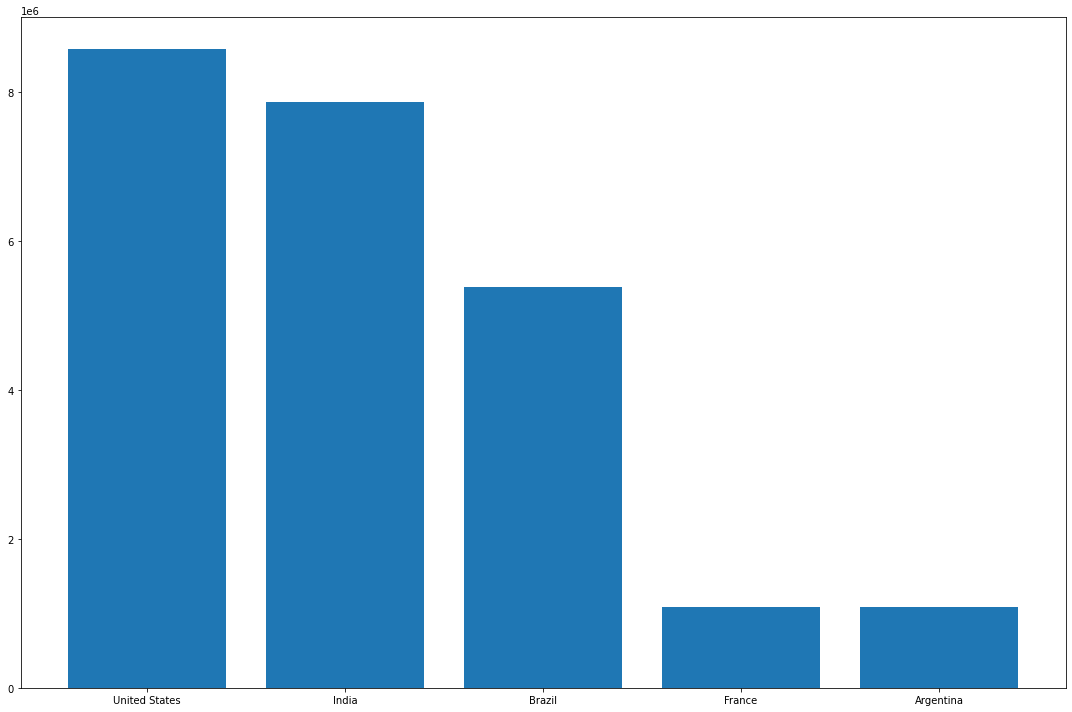

In [31]:
# gráfico de barras para total de casos
top_5_total_cases = df.loc[df.date == '2020-10-25', ['location', 'total_cases']].sort_values(by="total_cases", ascending=False)[1:6]

fig, ax = plt.subplots(figsize=(15,10))
ax.bar('location', 'total_cases', data=top_5_total_cases)
plt.tight_layout()


## Total de mortes

In [41]:
# número total de mortes

df.loc[df.date == '2020-10-25', ['location', 'total_deaths']].sort_values(by='total_deaths', ascending=False)

,location,total_deaths
52140,World,1151323.0
49591,United States,224899.0
7009,Brazil,156903.0
22238,India,118534.0
31135,Mexico,88743.0
...,...,...
41596,Seychelles,NaN
42814,Solomon Islands,NaN
47106,Timor,NaN
50484,Vatican,NaN


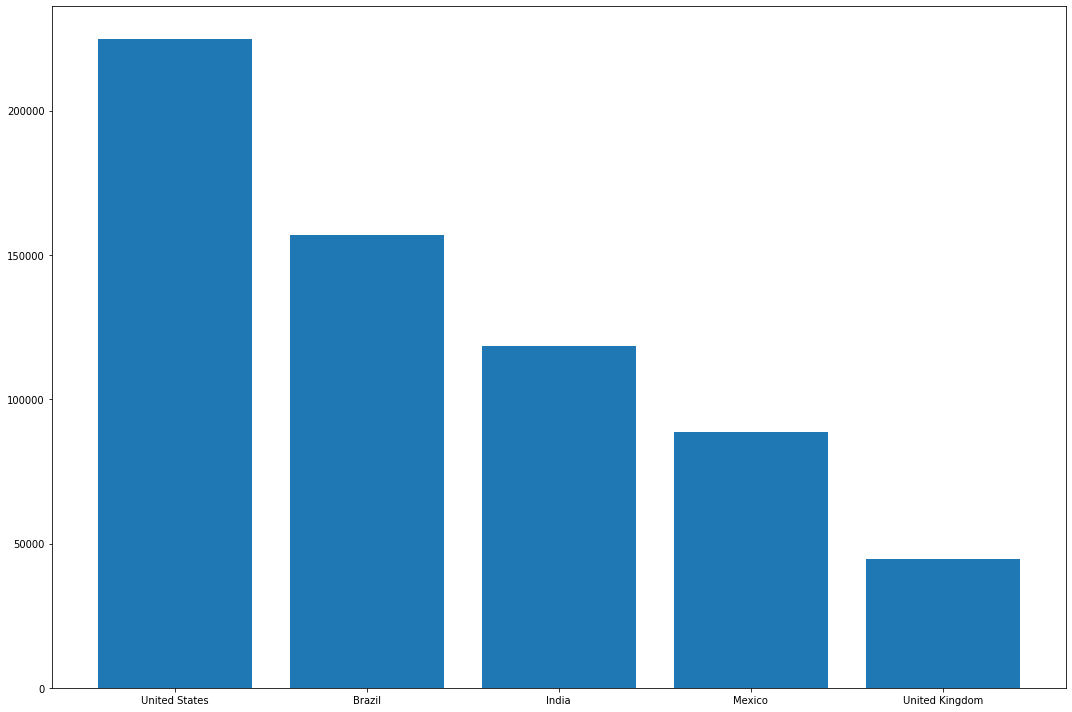

In [49]:
# gráfico de barras para total de mortes
top_5_total_deaths = df.loc[df.date == '2020-10-25', ['location', 'total_deaths']].sort_values(by="total_deaths", ascending=False)[1:6]

fig, ax = plt.subplots(figsize=(15,10))

ax.bar('location', 'total_deaths', data=top_5_total_deaths)

plt.tight_layout()



## Países com novos casos

In [79]:
# países com mais novos casos

new_cases = df.loc[df.date == '2020-10-25', ['location', 'continent', 'new_cases']].sort_values(by='new_cases', ascending=False)[1:11]
new_cases

,location,continent,new_cases
49591,United States,North America,83056.0
22238,India,Asia,50129.0
17097,France,Europe,45422.0
7009,Brazil,South America,26979.0
49291,United Kingdom,Europe,23012.0
24257,Italy,Europe,19640.0
37913,Poland,Europe,13628.0
12732,Czech Republic,Europe,12474.0
1948,Argentina,South America,11968.0
18366,Germany,Europe,11176.0


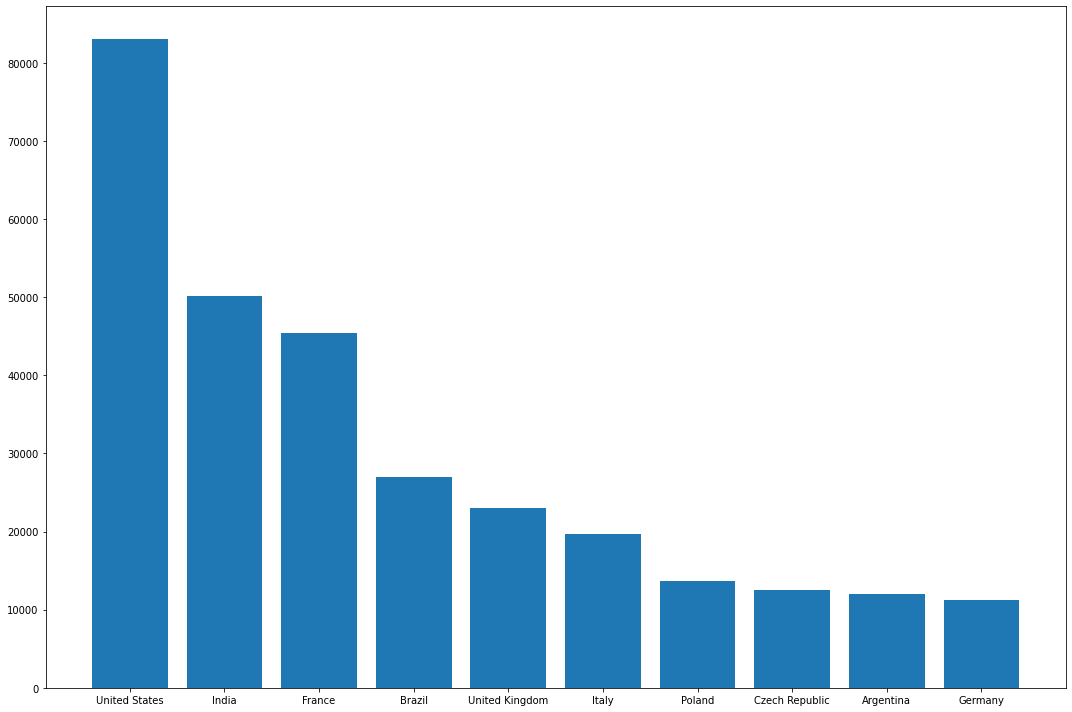

In [63]:
# grafico novos casos

fig, ax = plt.subplots(figsize=(15,10))

ax.bar('location', 'new_cases', data=new_cases)

plt.tight_layout()

## Continentes com mais novos casos

In [113]:
# novos casos por região

regiao = new_cases.groupby(new_cases['continent']).sum().sort_values(by='new_cases', ascending=False)
regiao


,new_cases
continent,
Europe,125352.0
North America,83056.0
Asia,50129.0
South America,38947.0


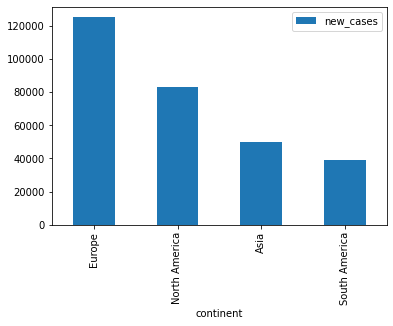

In [116]:
regiao.plot(kind='bar')
plt.show()

## Progressão do vírus no mundo

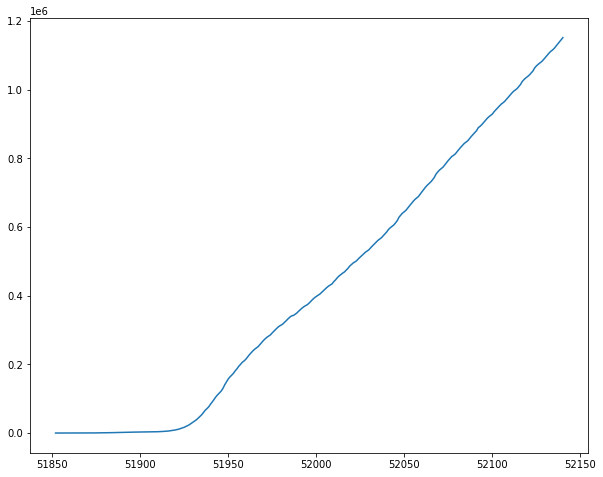

In [53]:
# Progressão do vírus

# gráfico de linha para mortes no mundo
df.loc[df.location == "World", "total_deaths"].plot(figsize=(10,8));

# Conclusões

Após uma rápida análise dos dados, observa-se que:

* Estados Unidos é o líder em número de casos e número de morte
* A India é o segundo país em número de casos mas o segundo em número de mortes é o Brasil
* Estados Unidos, India e França são os países com mais novos casos
* A Europa é o continente com mais novos casos, como retrata os noticiários sobre a crise da segunda onda do vírus

Diante desse cenário de pandemia e incertezas sobre estabilidade ou segunda onda do vírus, o que mais se aguarda é o momento da disponibilidade de vacinas.

Essa foi uma análise superficial sobre o vírus para meios de estudo.